# Lab 1 : F strings

In [2]:
variable = "right in the strings!"
print(f"f strings allow you to embed variables {variable}")

f strings allow you to embed variables right in the strings!


# Lab 2 : Model Representation


`x_train` - training feature value

`y_train` - training target value

`x_i, y_i` - ith training example

`w` - weight

`b` - bias

`m` - no. of training examples

`f_wb` - result of the model evaluation at x_i parametrised by w, b

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

Training example (2 data points)

| Size (1000 sqft) | Price (1000s of dollars) |
|------------------|-------------------------|
| 1.0              | 300                     |
| 2.0              | 500                     |

To do: Fit a linear regression model through these 2 points and predict house price for 1200 sq ft

In [4]:
#data stored in 1d numpy arrays
#create x_train and y_train variables
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [5]:
#finding the value of m
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"number of training examples (m) = {m}")

x_train.shape: (2,)
number of training examples (m) = 2


- `.shape` returns a tuple representing the size of each dimension of the array.
- For a 1D array: `arr = np.array([1, 2, 3]), arr.shape` would return `(3,)`.
- For a 2D array: `arr.shape` returns `(rows, columns)`.

In [6]:
#alternative wa to find m using len() function
m = len(x_train)
print(f"number of training examples (m) : {m}")

number of training examples (m) : 2


We use $(x^{(i)},\ y^{(i)})$ to denote the ith training example.

Since Python uses zero-based indexing:
- $(x^{(0)},\ y^{(0)})$ is $(1.0,\ 300.0)$
- $(x^{(1)},\ y^{(1)})$ is $(2.0,\ 500.0)$

In [7]:
for i in range(2): #0, 1
    x_i = x_train[i]
    y_i = y_train[i]

Plotting the training data using the `scatter()` function in `matplotlib` library.

The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

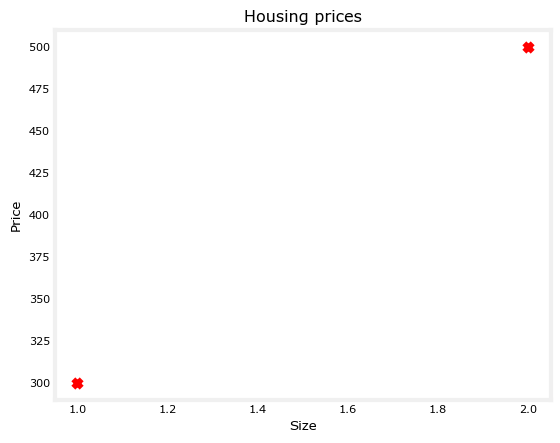

In [8]:
#plot training data points
plt.scatter(x_train, y_train, marker='x', c='r')

#set title
plt.title("Housing prices")

#set y-axis label
plt.ylabel("Price")

#set x-axis label
plt.xlabel("Size")

#plt.figure() #creates new canvas everytime you run so plots don't overlap
plt.show()

In [9]:
#starting with a random straight line
w = 200
b = 100

#compute f_wb for each data point, define a function to do this
#inputs : x (which is an array of size m containing the x values or features), w and b (which are scalars)
#outputs : f_wb(x) which is the model prediction for y

def compute_model_output(x, w, b):
    m = len(x)
    f_wb = np.zeros(m) #initialise the f_wb array of size m with zeroes, which stores the predictions for each data point
    for i in range(m): #loop runs from 0 to m-1
        f_wb[i] = w*x[i] + b #for each data point, compute the prediction for y and store it in f_wb array
    return f_wb #returns array of predictions

Now call the `compute_model_output()` function and plot the output

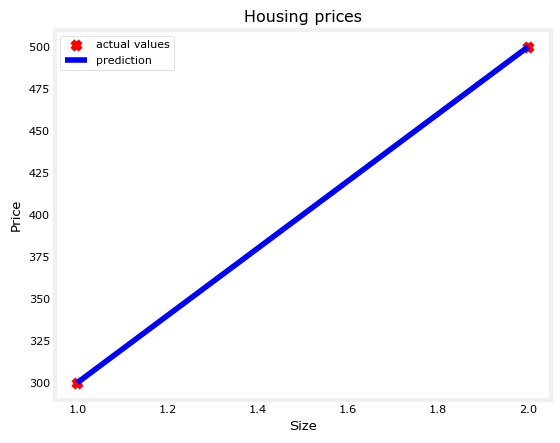

In [10]:
f_wb = compute_model_output(x_train, w, b) #the array of predicted prices

#scatter plot of individual training data points
plt.scatter(x_train, y_train, marker='x', c='r', label = "actual values")

#plot model prediction
plt.plot(x_train, f_wb, c = "b",label = "prediction") #draws the line connecting the predicted values

plt.title("Housing prices")
plt.ylabel("Price")
plt.xlabel("Size")
plt.legend() #displays the legend (the box on top left) showing the defined labels
plt.show()

Noe that we have fit a line, we can predict values for any input

In [11]:
x_val = 1.2 #to find price of 1200 sq ft house
cost = w*x_val + b
print(f"cost is {cost:.0f} thousand USD")

cost is 340 thousand USD


# Lab 3 : Cost function

The equation for cost with one variable is:

$$
J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2 
$$

where

$$
f_{w,b}(x^{(i)}) = w x^{(i)} + b 
$$

In [12]:
import numpy as np
%matplotlib widget 
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

- `%matplotlib` inline displays static images of your plots.
- `%matplotlib` widget displays interactive plots (e.g., zoom, pan, update in real time).

`lab_utils_uni`: This is the name of a Python file (module) in your folder, specifically `lab_utils_uni.py`.
`import ...`: This part tells Python to bring specific functions or objects from that module into your current script or notebook.

Here’s what each imported function/class from lab_utils_uni.py does:
1. `plt_intuition(x_train, y_train)`

Purpose:
Creates an interactive plot to help visualize how the cost changes as the weight parameter w changes in a simple linear regression model.

How:
Uses a slider to adjust w and shows how the model’s predictions and cost change.
Plots both the data/model fit and the cost function vs. w.

Use case:
Great for building intuition about how the cost function behaves with respect to model parameters.

2. `plt_stationary(x_train, y_train)`

Purpose:
Visualizes the cost function in 2D and 3D for linear regression with two parameters (w and b).

How:
Plots the data/model fit, a contour plot of the cost function, and a 3D surface plot of the cost.
Allows you to see how the cost changes as both w and b vary.

Use case:
Useful for understanding the shape of the cost function and how optimization algorithms (like gradient descent) navigate it.

3. `plt_update_onclick`

Purpose:
A class for handling interactive updates to plots when you click on them (e.g., to update parameters or highlight points).

How:
Used as an event handler for interactive Matplotlib figures.

Use case:
Enables dynamic, interactive exploration of model behavior in Jupyter notebooks.

4. `soup_bowl()`

Purpose:
Plots a classic “bowl-shaped” 3D cost function surface

How:
Creates a 3D plot showing the cost surface, which is a common analogy for convex optimization problems.

Use case:
Helps visualize why gradient descent works well on convex cost functions.

In [13]:
#calculate cost for each examp;e
def compute_cost(x, y, w, b):
    """
        Computes the cost function for linear regression.
    
        Args:
        x (ndarray (m,)): Data, m examples 
        y (ndarray (m,)): target values
        w,b (scalar)    : model parameters  
    
        Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    #number of training examples
    m = x.shape[0]
    cost_sum = 0 #initialise cost to 0

    for i in range(m):
        f_wb = w*x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
        
    total_cost = (1/(2*m))*cost_sum

    return total_cost

We already determined that b = 100, so let's vary the value of w and see where cost is minimised

In [14]:
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

Cost is minimised when w=200, which matches results from lab 2

Now, we can visualise cost in 3D and can see how cost varies with both `w` and `b` using a contour plot. 

plotting routines are in `lab_utils_uni.py` btw

We include more points in our dataset which don't lie on the same line

In [15]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In the contour plot, we can click a point to select `w` and `b` to achieve lowest cost. 

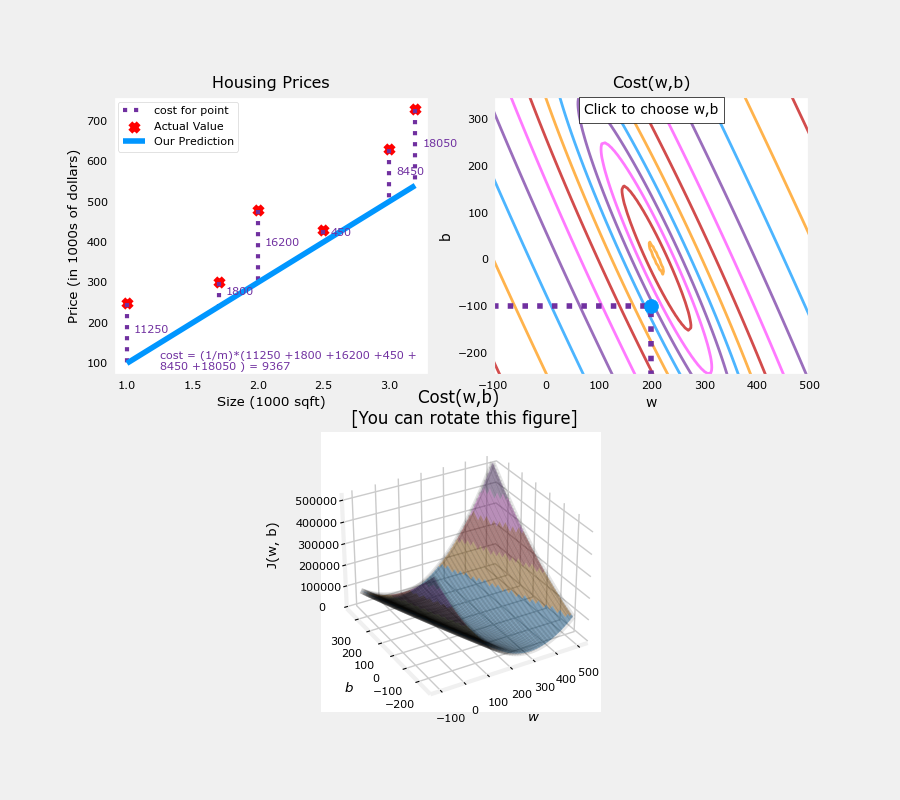

In [16]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

1. `plt.close('all')`

Purpose:
Closes all open Matplotlib figure windows.

Why:
Prevents overlapping or cluttered plots by ensuring you start with a clean slate before creating new figures.

2. `fig, ax, dyn_items = plt_stationary(x_train, y_train)`

Purpose:
Calls the plt_stationary function (from your `lab_utils_uni.py`), which:
Plots the data/model fit, a contour plot of the cost function, and a 3D surface plot of the cost for linear regression.

Returns:
fig: The Matplotlib figure object.
ax: An array of axes objects (subplots) for further customization or updates.
dyn_items: A list of dynamic plot elements (like scatter points or lines) that may be updated interactively.

Why:
Sets up the main visualization for exploring the cost function landscape.

3. `updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)`

Purpose:
Creates an instance of the `plt_update_onclick` class, which is designed to handle interactive updates to the plot when you click on it.
This class likely connects event handlers to the figure, so clicking on the plot can update parameters or highlight points dynamically.

Why:
Enables interactive exploration—when you click on the plot, it updates in real time, helping you understand how the cost function changes with different parameter values.



Values of approximately  `𝑤=209` and  `𝑏=2.4` provide low cost. 

Note that, because our training examples are not on a line, the minimum cost is not zero.

The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the  `𝑤` and  `𝑏` dimensions scale differently, this is not easy to recognize. The following plot, where  `𝑤` and  `𝑏` are symmetric

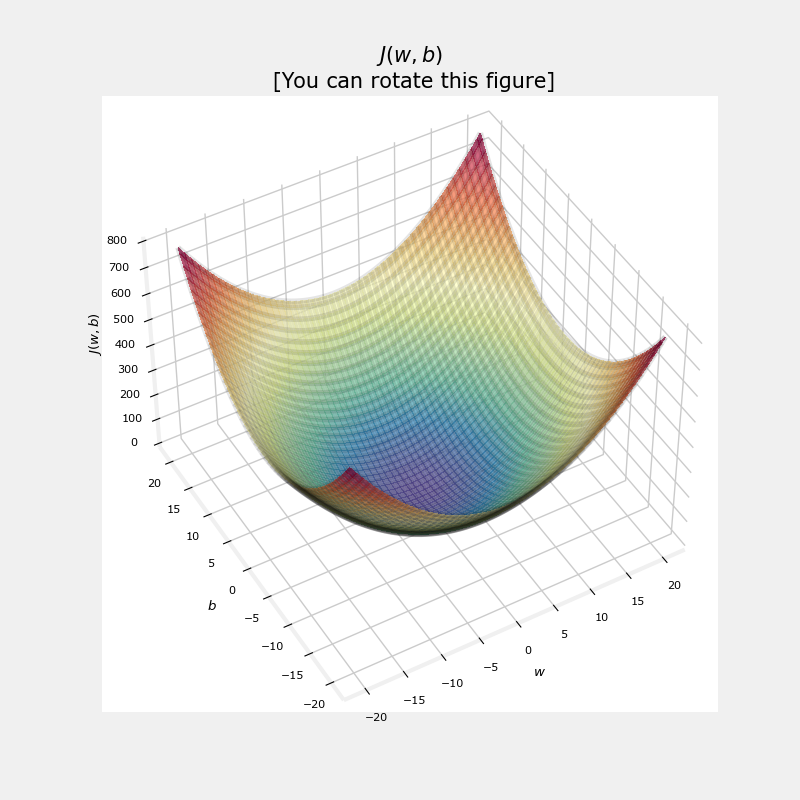

In [17]:
soup_bowl()

# Lab 4: Gradient Descent

We will automate the process of optimising `w` and `b` using gradient descent

In [18]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients


In [19]:
#load data set
x_train = np.array([1.0, 2.0]) #features (size in 1000 sqft)
y_train = np.array([300.0, 500.0]) #targets (price in 1000s of dollars)


To implement gradient dscent, we need 3 functions:

1. `compute_gradient` to calculate the partial derivatives wrt the parameters
2. `compute_cost` which we defined before, i.e, J(w,b)
3. `gradient_descent` which utilises both tthe above functions

Conventions:

Pd of J(w,b) wrt b will be `dj_db`

Pd of J(w,b) wrt w will be `dj_dw`

`compute_gradient` returns partial derivatives `dj_db` and `dj_dw`

It implements the equations
$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i = 0}^{m-1} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big) x^{(i)}
$$

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i = 0}^{m-1} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)
$$



In [20]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
    x : feature values, ndarray of dimension (m,)
    y : target values, ndarray of dimension (m,)
    w, b : scalar model parameters
    Returns:
    dj_dw : scalar, gradient of cost J wrt w
    dj_db : scalar, gradient of cost J wrt b
    """
    #Number of training examples
    m = x.shape[0]
    #Initialise dj_dw and dj_db
    dj_dw = 0
    dj_db = 0 

    for i in range(m):
        f_wb = w*x[i] + b

        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]

        dj_dw = dj_dw + dj_dw_i
        dj_db = dj_db + dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    

    return dj_dw, dj_db

Let's use our `compute_gradient` function to find and plot some partial derivatives of our cost function relative to one of the parameters,  𝑤0.

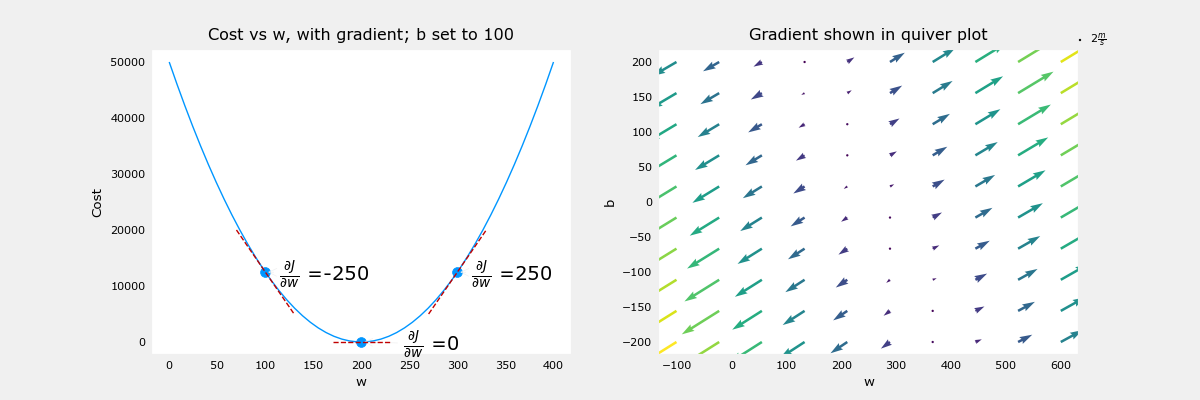

In [21]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient) #This routine is designed to visualise the gradients (slopes) of the cost function J wrt the parameters
plt.show()

The 'quiver plot' on the right provides a means of viewing the gradient of both parameters. The arrow sizes reflect the magnitude of the gradient at that point.

Note that the gradient points away from the minimum. The scaled gradient is subtracted from the current value of  𝑤 or  𝑏. This moves the parameter in a direction that will reduce cost.

Now we define the actual gradient descent algorithm

In [22]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking  num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    # An array to store cost J and parameterss at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
      # Calculate the gradient and update the parameters using gradient_function
      dj_dw, dj_db = gradient_function(x, y, w, b)    

      #update parameters
      b = b - alpha * dj_db
      w = w - alpha * dj_dw

      #Note cost J at each iteration
      if i<100000: #prevent resource exhaustion
         J_history.append(cost_function(x,y,w,b))
         p_history.append([w,b])
      
      # Print cost at every 10 intervals or as many times as iterations if < 10
      if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
              f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
              f"w: {w: 0.3e}, b:{b: 0.5e}")
        
    return w, b, J_history, p_history #return w and J,w history for graphing

Implement GD using the above defined algo

In [23]:
#initialise paameters
w_init = 0
b_init = 0

#GD settings
iterations = 10000
tmp_alpha = 1.0e-2

#run GD
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


Observations:
- The cost starts large and rapidly declines
- The partial derivatives, dj_dw, and dj_db also get smaller, rapidly at first and then more slowly
- As the process nears the 'bottom of the bowl' progress is slower due to the smaller value of the derivative at that point.
- Progress slows though the learning rate, alpha, remains fixed (notes page 6)

A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

Explanation:
1. Creates a figure with two subplots (side by side).
- `fig` is the overall figure object.
- `ax1` and `ax2` are the two axes (subplots).
- `constrained_layout=True` automatically adjusts spacing to prevent overlap.
- `figsize=(12,4)` sets the figure size to 12 inches wide by 4 inches tall.

2. Plots the first 100 cost values (from the list/array `J_hist`) on the first subplot (`ax1`).
- This shows how the cost changes in the early iterations

3. Plots the cost values from iteration 1000 onward on the second subplot (`ax2`).
- `1000 + np.arange(len(J_hist[1000:]))` creates the x-axis values starting from 1000, matching the indices of the later iterations.
- `J_hist[1000:]` is the cost history from iteration 1000 to the end.
- This shows how the cost changes in the later part of training

4. Sets the titles for each subplot.
- `ax1` is titled "Cost vs. iteration(start)".
- `ax2` is titled "Cost vs. iteration (end)".

5. Sets the y-axis label to "Cost" for both subplots.

6. Sets the x-axis label to "iteration step" for both subplots.

7. Displays the figure and all its subplots.

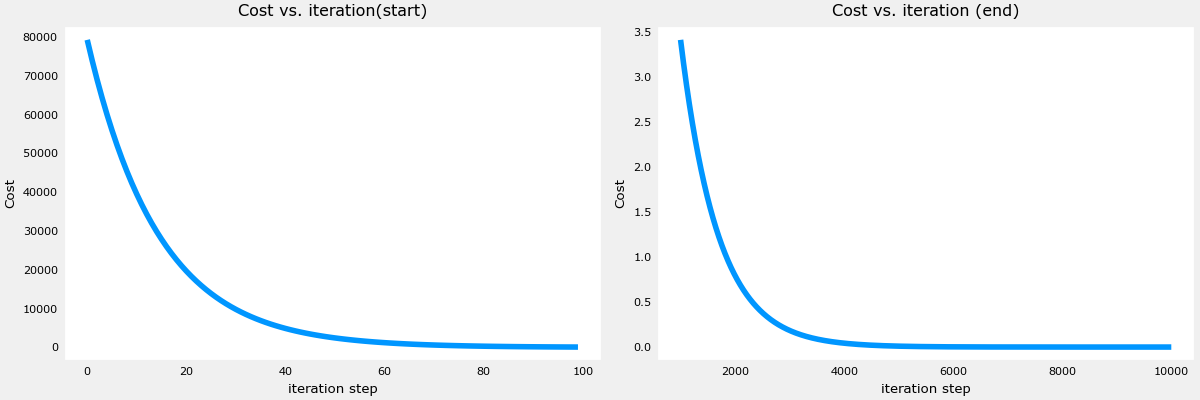

In [24]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Now that we have discovered the optimal values for the parameters  𝑤 and  𝑏, we can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing.

In [25]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


We can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).

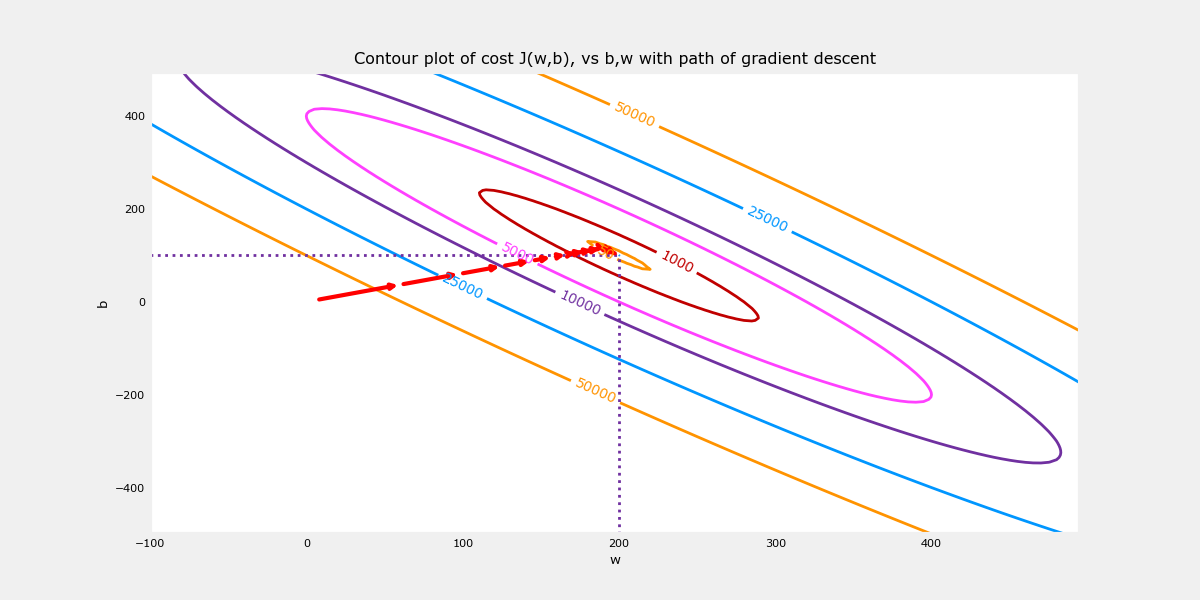

In [26]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Above, the contour plot shows the $cost(w,b)$ over a range of $w$ and $b$. Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:
- The path makes steady (monotonic) progress toward its goal.
- initial steps are much larger than the steps near the goal.

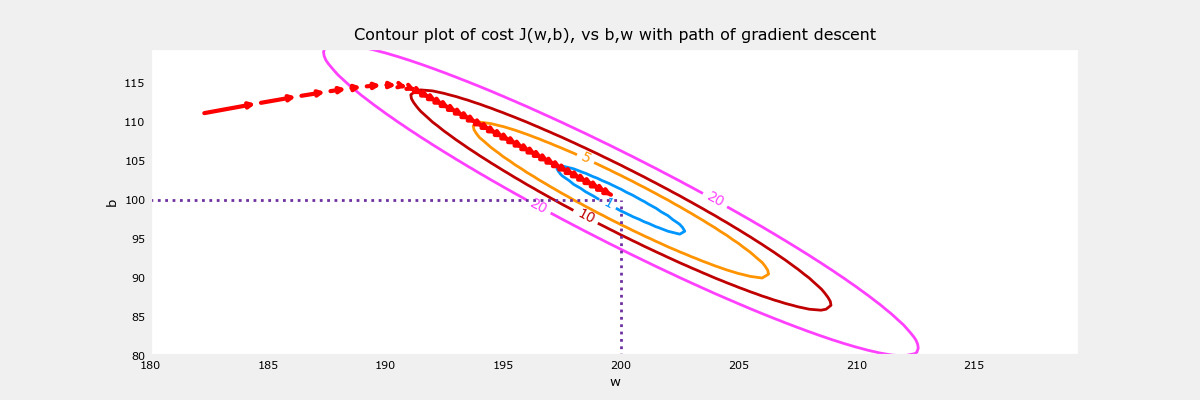

In [27]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

Let's try increasing the value of  𝛼 and see what happens

In [28]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


Above, $w$ and $b$ are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration $\frac{\partial J(w,b)}{\partial w}$ changes sign and cost is increasing rather than decreasing. This is a clear sign that the *learning rate is too large* and the solution is diverging. 

Visualise this with a plot

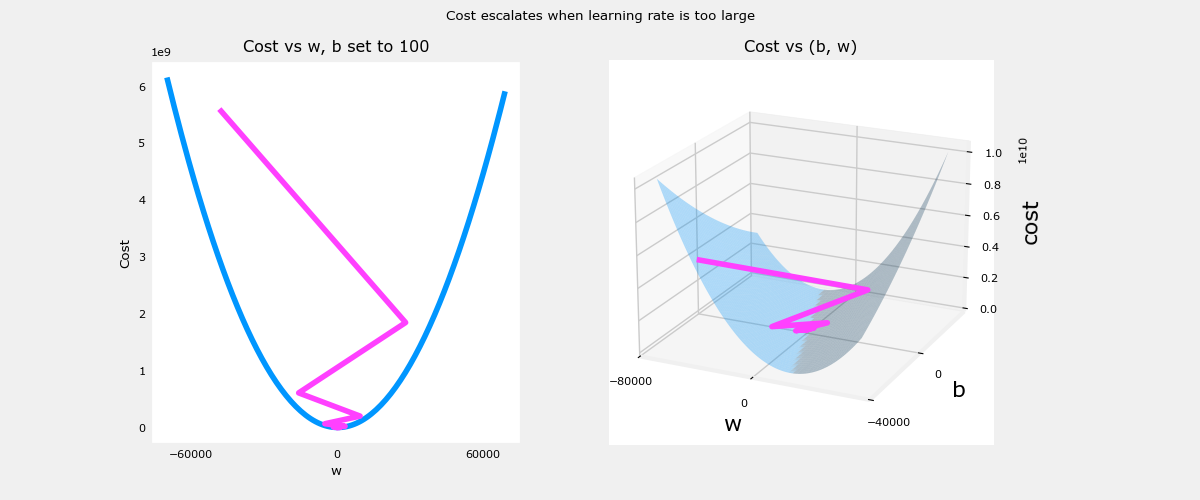

In [29]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()